<h2><center>SENG474 Project<center></h2>
    <h3><center>Predicting model for tennis match between Novak Djokovic and Rafael Nadal<center></h3>
        <center> <br> Yajun Wan(V00895974)</br><br>Runming Gao(V00872823)</br></center>
        








### Table of conetents
    1. Abstract
    2. Introduction
       2.1 Background
       2.2 Data Introduction
    3. Data Collection
    4. Data Preprocessing and Visualization
        4.1 Elo Ranking System
        4.2 Computing ratio for specific values
        4.3 Pearson Correlation
            4.3.1 Pearson Correlation Heatmap
            4.3.2 What does Pearson Correlation's value tell us
        4.4 Boxplot and Scatter plot
    5. Data Mining
        5.1 Test Data Size
        5.2 SMOTE（Synthetic Minority Over-sampling TEchnique）
        5.3 Recursive Feature Elimination(RFE)
    6. Evaluation
    7. Conclusion
    8. Reference

### 1. Abstract
In recent years, with the process of globalization, international sports competitions, such as the Olympic Games and the World Cup, have attracted more and more people's attention.  There are also properties try to make money by betting on the outcome of each match, however, this is not the intention for this project, since we are only predicting the outcome for study and research use.

Our project separated into 6 sections, we first preprocessed and normalized the data to avoid discrete range, second, we chose to use both **Pearson Correlation** and **Recursive Feature Elimination** feature selecting algorithm to determine which attributes will be fed into final model, last, we decided to use**Logistic Regression** as our model based on binary value of our classifier.

### 2. Introduction

### 2.1 Background

In recent years, with the process of globalization, international sports competitions, such as the Olympic Games and the World Cup, have attracted more and more people's attention. Among them, the ball games, especially attract people's attention because the two sides of the match will try to beat each other desperately. Because the Chinese player Na Li has won the Australian open and the French open, the tennis match has raised the upsurge in China. Chinese teenagers are also more likely to watch tennis. The fans of the players are also keen to compare the winning probabilities of the players. 

Among so many players, Rafael Nadal and Novak Djokovic are particularly eye-catching. Novak Djokovic was born in Belgrade, Serbia in 1987, and is Serbia's first tennis Grand Slam singles champion. Djokovic ranks the second in the world now. So far he has won 16 Grand Slam Gold Cup and 33 Masters Championships. And he is the first tennis player to reach a total prize of 100 million US dollars. 

Rafael Nadal Parrera was born in Majorca, Spain in 1986. He is the seventh men's singles slam and the second men's singles gold slam winner in history, the first Spanish year-end champion in the age of tennis. So far, he has won 19 Grand Slam gold cups, including a record 12th French Open men's singles title, and 35 gold cups in the Masters. Nadal ranks the first in the world at present.

  
### 2.2 Data Introduction
  
 Usually in a match, the following data needs to be introduced carefully. The explaination below is based on the description of GMAdevs.[1]
 
 winner_seed: the winner's seed ranking for the event
 winner_rank_points: the winner's points in the ATP ranking points system
 winner_rank: the rank of the winner in the ATP ranking points system
 w_ace: the absolute number of aces of the winner in the match
 w_df: the number of double faults of the winner in the match
 w_svpt: the total serve points of the winner in the match
 w_1stIn: the number of the first serve in of the winner in the match
 w_1stWon: the number of the points won on 1st serve of the winner in the match
 w_2ndWon: the number of the points won on 2nd serve of the winner in the match
 w_bpSaved: the number of break points saved of the winner in the match
 w_bpFaced: the number of break points faced of the winner in the match
 
 The above explanation is the same for the loser of the match. 
  
  
  


### 3. Data Collection

Because the two authors of this project are tennis enthusiasts, we planed to seek tennis-related data from kaggle[1] for analysis. After searching in the kaggle for a while, we chose Association of Tennis Professionals Matches(ATP tournament results from 2006 to 2015) as our source.



### 4. Data Preprocessing and Visualization

Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. This part intends to use mathmetical graphs and figures to show whether there is a linear relationship between the column features and expected results, thus, we can choose the most appropriate feature to form our predicting model.

Since there are 49 columns in total, we decide to drop some categorical features beforehead such as "tourney_level","tourney_name" and etc, and mainly focusing on numerical data.


In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame


from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# ignore all future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=RuntimeWarning)
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)



Table = pd.concat(map(pd.read_csv,['atp_matches_2006.csv','atp_matches_2007.csv',
                                             'atp_matches_2008.csv','atp_matches_2009.csv',
                                             'atp_matches_2010.csv','atp_matches_2011.csv',
                                             'atp_matches_2012.csv','atp_matches_2013.csv',
                                             'atp_matches_2014.csv','atp_matches_2015.csv']))

#drop some feature columns, which are considered to be the categorical features


Table = Table.drop(["tourney_name","tourney_level","draw_size","tourney_date","winner_id",
           "winner_seed","winner_entry","winner_hand","winner_ioc",
          "loser_id","loser_entry","loser_hand","loser_ioc","round","best_of",
          "minutes","match_num","loser_seed","winner_seed","winner_rank","loser_rank"],axis = 1)



### 4.1 Elo Ranking System
The Elo rating system is a method for calculating the relative skill levels of players in zero-sum games[2] for chess game.The calculation is as follows:

<img src ="https://www.betfair.com.au/hub/wp-content/uploads/sites/2/2018/02/Betfair-Equation_Tennis_1-1024x281.jpg">
The Elo rating starts out by giving each player the same Elo rating of 1500, which is then updated for each match they play. While the world rankings award player’s points for the stage and tier of the tournament they reach, the number of Elo points a player gains or loses depends on their opponent’s Elo rating.

If a player beats an opponent with a higher Elo rating than themselves, they gain more points than if they beat a player with a lower Elo rating. Conversely, if a player loses to a player with a lower Elo rating, they lose more Elo points than if they lost to a player with a higher rating.

According to the comparisons of accuracy between Elo Ranking model and Point based model[3], we found that the ELO is the most suitable approach to predict the winning ratio for one player. Thus, we decide to utilize the value in "rank_points" column to calculate Elo ranking points then substitute the "rank_points" column with "elo_ranking".

We have utilized some function from EloPy package from Github[9]

In [54]:
from elopy import *
i = Implementation()

Performance rating is a hypothetical rating that would result from the games of a single event only. Some chess organizations use the "algorithm of 400" to calculate performance rating. According to this algorithm, performance rating for an event is calculated in the following way:

For each win, add your opponent's rating plus 400,
For each loss, add your opponent's rating minus 400,
And divide this sum by the number of played games.
<br>
**<center>Performance rating</center>**
<table>
  <tr>
    <th>p</th>
    <th>diff_p</th> 
  </tr>
  <tr>
    <th>1.00</th>
    <th>+800</th> 
  </tr>
  <tr>
    <th>0.99</th>
    <th>+677</th> 
  </tr>
    <tr>
    <th>0.9</th>
    <th>+366</th> 
  </tr>
    <tr>
    <th>0.8</th>
    <th>+240</th> 
  </tr>
    <tr>
    <th>0.7</th>
    <th>+149</th> 
  </tr>
    <tr>
    <th>0.6</th>
    <th>+72</th> 
  </tr>
    <tr>
    <th>0.5</th>
    <th>0</th> 
  </tr>
    <tr>
    <th>0.4</th>
    <th>-72</th> 
  </tr>
    <tr>
    <th>0.3</th>
    <th>-149</th> 
  </tr>
    <tr>
    <th>0.2</th>
    <th>-240</th> 
  </tr>
    <tr>
    <th>0.1</th>
    <th>-366</th> 
  </tr>
    <tr>
    <th>0.01</th>
    <th>-677</th> 
  </tr>
    <tr>
    <th>0.00</th>
    <th>-800</th> 
  </tr>
</table>
<br>

In order to observe the winning ratio more intuitively, we decide to compute the favorite of the player to win one specific game based on the performance table above. According to this algorithm, performance rating for an event is calculated in the following way:

    For each win, add your opponent's rating plus 400,
    For each loss, add your opponent's rating minus 400,
    And divide this sum by the number of played games

In [55]:
def probabilities_winning(player1_rank,player2_rank):
    diff = []
    for (x,y)in zip(player1_rank,player2_rank):
        num = x-y
        diff.append(num)
    result = []
    for x in diff:
        if x in range(-800,-677):
            result.append(0.0)
        elif x in range(-677,-366):
            result.append(0.01)
        elif x in range(-366,-240):
            result.append(0.1)
        elif x in range(-240,-149):
            result.append(0.2)        
        elif x in range(-149,-72):
            result.append(0.3)  
        elif x in range(-72,0):
            result.append(0.4)              
        elif x in range(0,72):
            result.append(0.5)      
        elif x in range(72,149):
            result.append(0.6)             
        elif x in range(149,240):
            result.append(0.7)              
        elif x in range(240,366):
            result.append(0.8) 
        elif x in range(366,677):
            result.append(0.9)             
        elif x in range(677,800):
            result.append(0.99)
    return result

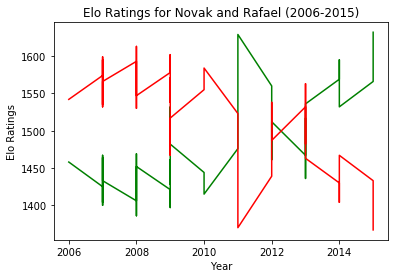

In [56]:

df_dj_and_nadal = Table[(Table.winner_name == 'Novak Djokovic') | (Table.winner_name  == 'Rafael Nadal')]
df_dj_and_nadal = df_dj_and_nadal[(df_dj_and_nadal.loser_name == 'Novak Djokovic') | (df_dj_and_nadal.loser_name  == 'Rafael Nadal')]
i.addPlayer("Novak Djokovic",rating = 1500)#set default ranking
i.addPlayer("Rafael Nadal",rating = 1500)#set default ranking to 1500
ranking_table = df_dj_and_nadal[['year','winner_name','winner_rank_points','loser_name','loser_rank_points']]

Elo_ranking_for_novak = []
Elo_ranking_for_rafael = []
for k in ranking_table['winner_name']:
    i.recordMatch("Novak Djokovic","Rafael Nadal",winner = k)
    Elo_ranking_for_novak.append(i.getPlayerRating('Novak Djokovic'))
    Elo_ranking_for_rafael.append(i.getPlayerRating('Rafael Nadal'))

Elo_ranking_for_novak = np.asarray(Elo_ranking_for_novak).astype(int)
Elo_ranking_for_rafael = np.asarray(Elo_ranking_for_rafael).astype(int)

novak_win_ratio = probabilities_winning(Elo_ranking_for_novak ,Elo_ranking_for_rafael)
nadal_win_ratio = probabilities_winning(Elo_ranking_for_rafael ,Elo_ranking_for_novak)

df_dj_and_nadal['nadal_win_ratio'] = nadal_win_ratio
df_dj_and_nadal['novak_win_ratio'] = novak_win_ratio

plt.plot(ranking_table['year'],Elo_ranking_for_novak,color = 'g')
plt.plot(ranking_table['year'],Elo_ranking_for_rafael,color = 'r')
plt.xlabel("Year")
plt.ylabel("Elo Ratings")
plt.title("Elo Ratings for Novak and Rafael (2006-2015)")
plt.show()



In this figure, red line represents the trend of Nadal's elo score and green line represents the trend of Djokovic's elo score. Overall, from 2006 to 2015, Nadal's score was on the decline and djokovic's was on the rise. In 2011, in particular, the points crossed, with Djokovic far outscoring Nadal.

### 4.2 Computing ratio for specific values
Instead of analysing the total sum of double faults, first serve-in, second serve-in and break-point faced, we decide to compute the ratio of each features, in other words, we are rescaling the data to have values between 0 to 1.The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values[4].

We didn't use the normalization approach as **z-score** or **t-score**, since the value of ratio is already lies between 0 to 1, and we found it performs well in the Pearson Correlation diagram, which will be discussed in the next section.

In [57]:
#now calculate the ratio of 1st serve win by novak

novak_1st_ratio = []
count = 0
for (x,y) in zip(df_dj_and_nadal['winner_name'],df_dj_and_nadal['loser_name']):
    if x == 'Novak Djokovic':
        num = df_dj_and_nadal['w_1stWon'].iloc[count]/df_dj_and_nadal['w_1stIn'].iloc[count]
        count+=1
        novak_1st_ratio.append(num)
    elif y == 'Novak Djokovic':
        num = df_dj_and_nadal['l_1stWon'].iloc[count]/df_dj_and_nadal['l_1stIn'].iloc[count]
        count+=1
        novak_1st_ratio.append(num)
df_dj_and_nadal['novak_1stWin_ratio'] = novak_1st_ratio

ranking_table = df_dj_and_nadal[['year','winner_name','novak_1stWin_ratio','loser_name']]
#now calculate the ratio of 1st serve win by rafael

nadal_1st_ratio = []
count = 0
for (x,y) in zip(df_dj_and_nadal['winner_name'],df_dj_and_nadal['loser_name']):
    if x == 'Rafael Nadal':
        num = df_dj_and_nadal['w_1stWon'].iloc[count]/df_dj_and_nadal['w_1stIn'].iloc[count]
        count+=1
        nadal_1st_ratio.append(num)
    elif y == 'Rafael Nadal':
        num = df_dj_and_nadal['l_1stWon'].iloc[count]/df_dj_and_nadal['l_1stIn'].iloc[count]
        count+=1
        nadal_1st_ratio.append(num)
df_dj_and_nadal['nadal_1stWin_ratio'] = nadal_1st_ratio

In [58]:
#now calculate the ratio of double fault ratio by novak
novak_df_ratio = []
count = 0
for (x,y) in zip(df_dj_and_nadal['winner_name'],df_dj_and_nadal['loser_name']):
    if x == 'Novak Djokovic':
        num = df_dj_and_nadal['w_df'].iloc[count]/df_dj_and_nadal['w_svpt'].iloc[count]
        count+=1
        novak_df_ratio.append(num)
    elif y == 'Novak Djokovic':
        num = df_dj_and_nadal['l_df'].iloc[count]/df_dj_and_nadal['l_svpt'].iloc[count]
        count+=1
        novak_df_ratio.append(num)
df_dj_and_nadal['novak_df_ratio'] = novak_df_ratio
#now calculate the ratio of double fault ratio by nadal
nadal_df_ratio = []
count = 0
for (x,y) in zip(df_dj_and_nadal['winner_name'],df_dj_and_nadal['loser_name']):
    if x == 'Rafael Nadal':
        num = df_dj_and_nadal['w_df'].iloc[count]/df_dj_and_nadal['w_svpt'].iloc[count]
        count+=1
        nadal_df_ratio.append(num)
    elif y == 'Rafael Nadal':
        num = df_dj_and_nadal['l_df'].iloc[count]/df_dj_and_nadal['l_svpt'].iloc[count]
        count+=1
        nadal_df_ratio.append(num)
df_dj_and_nadal['nadal_df_ratio'] = nadal_df_ratio


We also add one column named "novak_win" which represent win or lose for each match for Novak Djokovic, and we use "1" to represent "win" and "0" for "lose". This will create a binary classifier which will be used for logistic regression.

In [59]:
novak_1stWin = []
novak_df = []
novak_rank_points = []
novak_bpSaved = []
novak_bpSaved_ratio = []
novak_win = []
novak_2ndWin_ratio = []

count = 0
for (x,y) in zip(df_dj_and_nadal['winner_name'],df_dj_and_nadal['loser_name']):
    if x == 'Novak Djokovic':
        first_w = df_dj_and_nadal['w_1stWon'].iloc[count]
        double_f = df_dj_and_nadal['w_df'].iloc[count]
        rpt = df_dj_and_nadal['winner_rank_points'].iloc[count]
        bp  = df_dj_and_nadal['w_bpSaved'].iloc[count]
        bp_r = df_dj_and_nadal['w_bpSaved'].iloc[count]/df_dj_and_nadal['w_bpFaced'].iloc[count]
        w = 1
        snd_r = df_dj_and_nadal['w_2ndWon'].iloc[count]/(df_dj_and_nadal['w_svpt'].iloc[count]-df_dj_and_nadal['w_1stIn'].iloc[count])
        count+=1
        novak_1stWin.append(first_w)
        novak_df.append(double_f)
        novak_rank_points.append(rpt)
        novak_bpSaved.append(bp)
        novak_bpSaved_ratio.append(bp_r)
        novak_win.append(w)
        novak_2ndWin_ratio.append(snd_r)
    elif y == 'Novak Djokovic':
        first_w = df_dj_and_nadal['l_1stWon'].iloc[count]
        double_f = df_dj_and_nadal['l_df'].iloc[count]
        rpt =  df = df_dj_and_nadal['loser_rank_points'].iloc[count]
        bp  = df_dj_and_nadal['l_bpSaved'].iloc[count]
        bp_r = df_dj_and_nadal['l_bpSaved'].iloc[count]/df_dj_and_nadal['l_bpFaced'].iloc[count]
        w = 0
        snd_r = df_dj_and_nadal['l_2ndWon'].iloc[count]/(df_dj_and_nadal['l_svpt'].iloc[count]-df_dj_and_nadal['l_1stIn'].iloc[count])
        count+=1
        novak_1stWin.append(first_w)
        novak_df.append(double_f)
        novak_rank_points.append(rpt)
        novak_bpSaved.append(bp)
        novak_bpSaved_ratio.append(bp_r)
        novak_win.append(w)
        novak_2ndWin_ratio.append(snd_r)        
df_dj_and_nadal['novak_1stWin'] = novak_1stWin
df_dj_and_nadal['novak_df'] = novak_df
df_dj_and_nadal['novak_rank_points'] = novak_rank_points
df_dj_and_nadal['novak_bpSaved'] = novak_bpSaved
df_dj_and_nadal['novak_bpSaved_ratio'] = novak_bpSaved_ratio
df_dj_and_nadal['novak_win'] = novak_win
df_dj_and_nadal['novak_2ndWin_ratio'] = novak_2ndWin_ratio


In [60]:
final_table_list = list(zip(novak_win,novak_win_ratio,novak_1st_ratio,novak_2ndWin_ratio,novak_df_ratio,novak_1stWin,novak_df,novak_rank_points,novak_bpSaved,novak_bpSaved_ratio))
final_table = pd.DataFrame(final_table_list,columns = ['novak_win','novak_win_ratio','novak_1stWin_ratio','novak_2ndWin_ratio','novak_df_ratio',
                                                       'novak_1stWin','novak_df','novak_rank_points',
                                                       'novak_bpSaved','novak_bpSaved_ratio'
                                                       ])

final_table


,novak_win,novak_win_ratio,novak_1stWin_ratio,novak_2ndWin_ratio,novak_df_ratio,novak_1stWin,novak_df,novak_rank_points,novak_bpSaved,novak_bpSaved_ratio
0,0,0.3,0.551020,0.222222,0.044776,27.0,3.0,627.0,2.0,0.285714
1,0,0.3,0.573529,0.370370,0.010526,39.0,1.0,2810.0,3.0,0.333333
2,0,0.2,0.562500,0.315789,0.014925,27.0,1.0,2720.0,8.0,0.666667
3,1,0.4,0.804348,0.600000,0.028169,37.0,2.0,3200.0,8.0,1.000000
4,0,0.3,0.660000,0.407407,0.025974,33.0,2.0,3010.0,6.0,0.600000
5,0,0.2,0.769231,0.440000,0.039216,20.0,2.0,1715.0,1.0,0.250000
6,1,0.4,0.644444,0.750000,0.000000,29.0,0.0,2060.0,4.0,0.800000
7,0,0.3,0.613636,0.560000,0.000000,27.0,0.0,4470.0,5.0,0.625000
8,0,0.2,0.722222,0.483871,0.058824,39.0,5.0,4905.0,4.0,0.571429
9,1,0.4,0.718750,0.760000,0.000000,23.0,0.0,5055.0,1.0,1.000000


### 4.3 Pearson Correlation
Pearson’s correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables.  It is known as the best method of measuring the association between variables of interest because it is based on the method of covariance.[5]  It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship.

Given a pair of random variables 
(
X
,
Y
)
(X,Y), the formula for ρ is:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/43219265dc2c827cb4f5b34f2e3fb797bed2e820">
#### 4.3.1 Pearson Correlation Heatmap
A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between two discrete dimensions or event types.The values of the first dimensions appear as rows of the table, while the values of the second dimension are represented by the columns of the table. The color value of the cells is proportional to the number of measurements that match the dimensional values. This enables you to quickly identify incidence patterns, and to recognize anomalies

#### 4.3.2 What does Pearson Correlation's value tell us
Limit: Coefficient values can range from +1 to -1, where +1 indicates a perfect positive relationship, -1 indicates a perfect negative relationship, and a 0 indicates no relationship exists.

Degree of correlation:
Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).

High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.

Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.

Low degree: When the value lies below + .29, then it is said to be a small correlation.

No correlation: When the value is zero.[5]


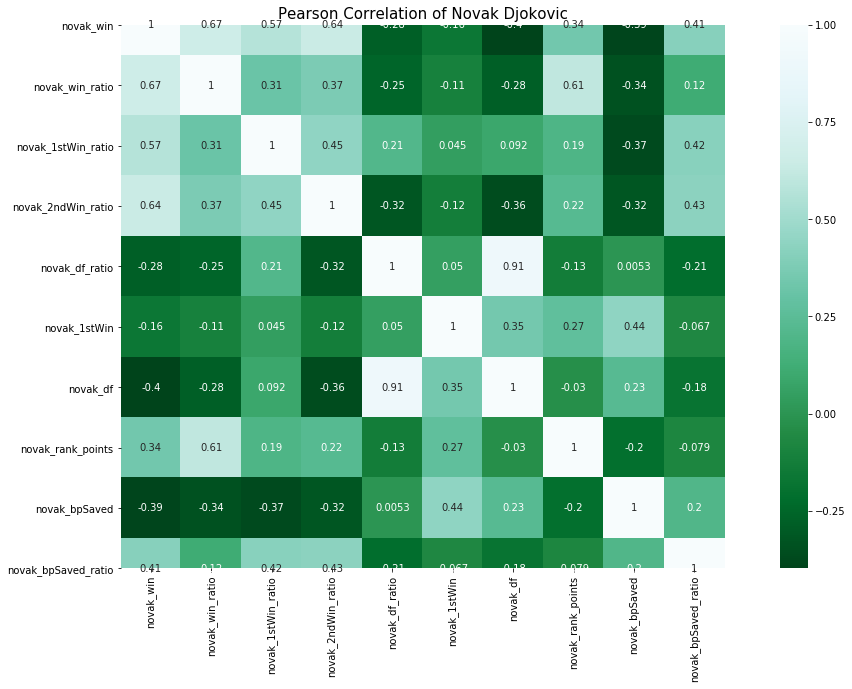

In [61]:

features_numerical = list(final_table)
plt.subplots(figsize=(20, 10))
sns.heatmap(df_dj_and_nadal[features_numerical].corr(), vmax=1.0, square=True, cmap="BuGn_r", annot=True)
plt.title("Pearson Correlation of Novak Djokovic", fontsize=15)
plt.show()
final_table_list = list(zip(novak_win,novak_win_ratio,novak_1st_ratio,novak_2ndWin_ratio,novak_df))
final_table_for_novak = pd.DataFrame(final_table_list,columns = ['novak_win','novak_win_ratio','novak_1stWin_ratio','novak_2ndWin_ratio',
                                                       'novak_df'])
final_table_for_novak = final_table_for_novak.dropna()
                                                       

So from the heatmap above, we can generate that there are three features that has strong correlation with the result of each match:

    novak_win_ratio: Calculated by Elo Ranking System
    novak_1stWin_ratio: Calculated based on the numbers of first-serveIN
    novak_2ndWin_ratio: Calculated based on the numbers of second-serveIN

However, we thought that some features that said to has medium correlation such as the numbers of double fault and numbers of break-point-saved, will also somehow effect the result of the match. Due to the size of our data set, there might not be adequate information for this algorithm to choose which feature can be included to form the final model for regression. Therefore, we decide to use boxplot and scatter plot diagram to show how much those features will affect the result. 

### 4.4 Boxplot and Scatterplot
#### 4.4.1 Boxplot
Boxplot is a way to aggregate and summarize the data which measured on an interval scale[6]. This type of diagram is aiming to analyse explanatory data since it can show the shape of the distribution, central value and its variability
<img src="https://miro.medium.com/max/13050/1*2c21SkzJMf3frPXPAR_gZA.png" width = "600" height = "300">

As shown above, we are going to analyze how our data spread on the specific interval by interquartile range (IQR).

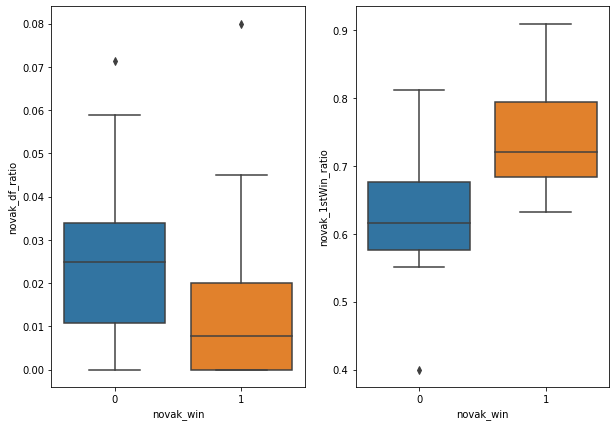

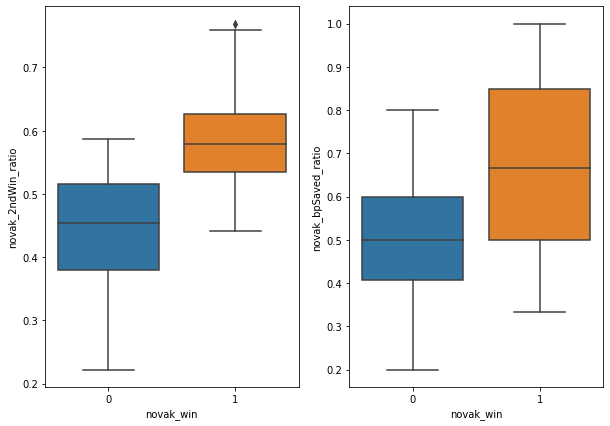

In [62]:
f, axes = plt.subplots(1, 2, figsize=(10,7))
sns.boxplot(df_dj_and_nadal["novak_win"],df_dj_and_nadal["novak_df_ratio"],  ax=axes[0])
sns.boxplot(df_dj_and_nadal["novak_win"],df_dj_and_nadal["novak_1stWin_ratio"], ax=axes[1])
f, axes = plt.subplots(1, 2, figsize=(10,7))
sns.boxplot(df_dj_and_nadal["novak_win"],df_dj_and_nadal["novak_2ndWin_ratio"], ax=axes[0])
sns.boxplot(df_dj_and_nadal["novak_win"],df_dj_and_nadal["novak_bpSaved_ratio"], ax=axes[1])
plt.show()

According to the figure we generated by boxplot, we can say that each of the four features tends to have relative affact on the final result, since the data is spreading on the interval with short length, not too discrete to identify. However, we recognize there are "outliers" appeared in "df_ratio","1stWin_ratio" and "2ndWin_ratio", however, due to our inadequate data size, we decide to mainly focusing on the distribution of the data. Therefore, we use another plot figure, scatter plot, to see how those features relates to the results.

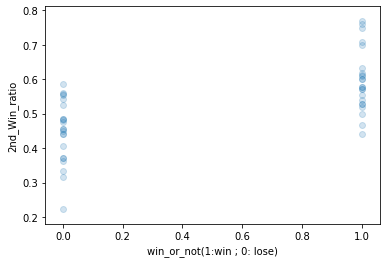

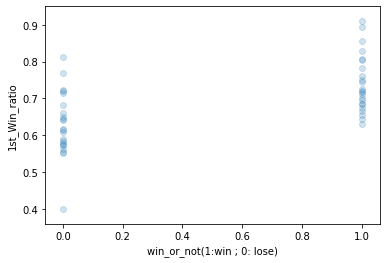

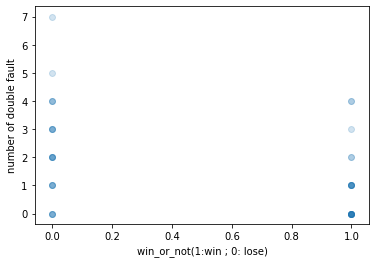

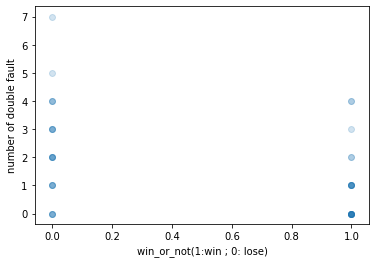

In [63]:
plt.scatter(df_dj_and_nadal["novak_win"],df_dj_and_nadal["novak_2ndWin_ratio"], alpha=.2)
plt.xlabel("win_or_not(1:win ; 0: lose)")
plt.ylabel("2nd_Win_ratio")
plt.show()

plt.scatter(df_dj_and_nadal["novak_win"],df_dj_and_nadal["novak_1stWin_ratio"], alpha=.2)
plt.xlabel("win_or_not(1:win ; 0: lose)")
plt.ylabel("1st_Win_ratio")
plt.show()

plt.scatter(df_dj_and_nadal["novak_win"],df_dj_and_nadal["novak_df"], alpha=.2)
plt.xlabel("win_or_not(1:win ; 0: lose)")
plt.ylabel("number of double fault")
plt.show()

plt.scatter(df_dj_and_nadal["novak_win"],df_dj_and_nadal["novak_df"], alpha=.2)
plt.xlabel("win_or_not(1:win ; 0: lose)")
plt.ylabel("number of double fault")
plt.show()

Compared to scatter plot, box plot is much more intuitive and obvious. There seems no significant impact if we ignore the unusual points in the boxplots.

In [64]:
#preprocessing the data for nadal
nadal_df = []
nadal_win = []
nadal_2ndWin_ratio = []

count = 0
for (x,y) in zip(df_dj_and_nadal['winner_name'],df_dj_and_nadal['loser_name']):
    if x == 'Rafael Nadal':
        df = df_dj_and_nadal['w_df'].iloc[count]
        w = 1
        snd_r = df_dj_and_nadal['w_2ndWon'].iloc[count]/(df_dj_and_nadal['w_svpt'].iloc[count]-df_dj_and_nadal['w_1stIn'].iloc[count])
        count+=1
        nadal_df.append(df)
        nadal_win.append(w)
        nadal_2ndWin_ratio.append(snd_r)
    elif y == 'Rafael Nadal':
        df = df_dj_and_nadal['l_df'].iloc[count]
        w = 0
        snd_r = df_dj_and_nadal['l_2ndWon'].iloc[count]/(df_dj_and_nadal['l_svpt'].iloc[count]-df_dj_and_nadal['l_1stIn'].iloc[count])
        count+=1
        nadal_df.append(df)
        nadal_win.append(w)
        nadal_2ndWin_ratio.append(snd_r)

df_dj_and_nadal['nadal_df'] = nadal_df
df_dj_and_nadal['nadal_win'] = nadal_win
df_dj_and_nadal['nadal_2ndWin_ratio'] = nadal_2ndWin_ratio

final_table_list = list(zip(nadal_win,nadal_win_ratio,nadal_1st_ratio,nadal_2ndWin_ratio,nadal_df))
final_table_for_nadal = pd.DataFrame(final_table_list,columns = ['nadal_win','nadal_win_ratio','nadal_1stWin_ratio','nadal_2ndWin_ratio',
                                                       'nnadal_df'])

### 5 Data Mining
In this part, we decide to introduce another feature elimination approach,**Recursive Feature Elimination(RFE)**, since there are only three appropriate attributes that generated by Pearson Correlation heatmap, in order to avoid underfitting, we will scanning the data from the very beginning. 
#### 5.1 Test Data Size
Generally, there are three ratios to split the test data size, we decide to use 8:2, since we have a small size on the whole data we are using, there seems less variance if we choose to hold less for test data.
#### 5.2 SMOTE（Synthetic Minority Over-sampling TEchnique）
Using a machine learning algorithm out of the box is problematic when one class in the training set dominates the other. Synthetic Minority Over-sampling Technique (SMOTE) solves this problem[7]. In all the 45 matches between Djokovic and Nadal, Djokovic has been the winner for over 30 matches, therefore, we need to avoid machine learning algorithm seeing only the domination of Djokovic.
#### 5.3 Recursive Feature Elimination(RFE)
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute.[8] Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.
#### 5.4 Logistic Regression
In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing, therefore, for our project, which we use the binary classifier,(1 stands for win,0 for lose), and we choose to remain the default threshold as 0.5. After feeding the trained model to the regression model, it will predict a *y_pred*,which is used for computing classification report.

In [65]:

from imblearn.over_sampling import SMOTE
df_dj_and_nadal1 =df_dj_and_nadal
df_dj_and_nadal1 = df_dj_and_nadal1.drop(["surface","winner_name","loser_name","score"],axis = 1)
df_dj_and_nadal1 = df_dj_and_nadal1.dropna()
head = df_dj_and_nadal1.columns
x = df_dj_and_nadal1.loc[:,df_dj_and_nadal1.columns != 'novak_win']
y = df_dj_and_nadal1.loc[:,df_dj_and_nadal1.columns == 'novak_win']
os = SMOTE(random_state = 0)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)
columns = X_train.columns
os_x,os_y = os.fit_sample(X_train,y_train)


from sklearn.feature_selection import RFE
logreg = LogisticRegression()
y = ['novak_win']
x = [i for i in df_dj_and_nadal1 if i not in y]
rfe = RFE(logreg,20)
rfe = rfe.fit(os_x,os_y.ravel())

index = [i for i in range(len(rfe.support_)) if rfe.support_[i] == True]
features_using_RFE = [head[i] for i in index]

#feed the x,y set with pearson correlation into regression
cols = ['novak_1stWin_ratio','novak_2ndWin_ratio','novak_win_ratio']
x_with_pearson_correlation = final_table_for_novak[cols]#result from pearson correlation
y = final_table_for_novak['novak_win'].as_matrix().ravel()
X_train,X_test,y_train,y_test = train_test_split(x_with_pearson_correlation,y,test_size = 0.2,random_state = 0)

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
score_of_p = model.score(X_test,y_test)
print()
print()


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))





              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.67      1.00      0.80         4

    accuracy                           0.78         9
   macro avg       0.83      0.80      0.77         9
weighted avg       0.85      0.78      0.77         9



In [66]:
#feed the x,y set with rfe into regression
x_with_rfe = df_dj_and_nadal1[features_using_RFE]#result from rfe algorithm
y = df_dj_and_nadal1['novak_win']
X_train,X_test,y_train,y_test = train_test_split(x_with_rfe,y,test_size = 0.2,random_state = 0)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print()
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



### 6.Evaluation
Here we print out the **classification report** for both feature engineering algorithm that we chose,the reported averages include macro average (averaging the unweighted mean per label), weighted average (averaging the support-weighted mean per label). The weighted average for the model using the features chose by Pearson Correlation (with **precision's weighted average** to be 0.83 and **recall's weighted average** to be 0.80)is lower than what is shown in the report for the model using RFE (with**preision's weighted average** to be 0.91 and **recall's weighted average** to be 0.89). Also, we use *metrics.accuracy_score()* to compute the accuracy generated by the actual value *y_test* and the prediction *y_pred* from our model, as shown below: 


<br>
<center>Comparions between the result using PC and RFE algorithm</center>
<table>
  <tr>
    <th>Algorithm used</th>
    <th>Accuracy</th> 
  </tr>
  <tr>
    <td>Pearson Correlation</td>
    <td>77.83%</td> 
  </tr>
  <tr>
    <td>Recursive Feature Elimination</td>
    <td>88.89%</td> 
  </tr>
</table>
<br>
It turns out that the model that fed by the attributes with RFE algorithm tends to gain higher accuracy than what with Pearson Correlation does, again, due to our size of the data, we hold reservations to whether Pearson Correlation is suitable for our condition. Overall, both feature selection algorithm provided objective suggestion on choosing data, and the final results indicate relatively accurate ratio on predicting the outcome of the matches, with both accuracy above 65%. 

### 7.Conclusion
The reason of considering two ways of feature selecting algorithm is to avoid data overfitting, since the number of features that shows high correlation with the outcome generated by Pearson Correlation is inadequate, and also due to our size of data, we need more guarantees on the final result.

Since our classifier is the outcome of each match, with values to be 0 or 1(binary), so the **Logistc Regression** is considered to be more applicable to fit our model, and we maintain the default threshold of 0.5.

Though there might be minor deviation or residual from the data that we fed into the regression model aside, we applied some algorithms to deal with the proplem of over-sampling, the prediction literally provided a successful outcome as we expect.

### 8.Reference

[1] GMAdevs, Association of Tennis Professionals Mathches(ATP tournament results from 2000 to 2017). 
    Available: https://www.kaggle.com/gmadevs/atp-matches-dataset
    
[2] WikiPedia, "Elo Ranking System",Nov,2019.[online]. 
    Available:https://en.wikipedia.org/wiki/Elo_rating_system. [Accessed Nov.15,2019].
   
[3] BetFair, "An Introduction to Tennis Modeling".[online].
    Available:https://www.betfair.com.au/hub/an-introduction-to-tennis-modelling/. [Accessed Nov.17,2019]
    
[4] Medium, Machine Learning, "Why Data Normalization is necessary for Machine Learning models",Urvashi Jaitley,Oct 7, 2018. [online]. Available:https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029. [Accessed Nov.17,2019]

[5] StatisticsSolutions, "Pearson's Correlation Coefficient", 2019. [online]. Available: "https://www.statisticssolutions.com/pearsons-correlation-coefficient/". [Accessed Nov.23,2019]

[6] Statics Canada, "Constructing box and whisker plots", Oct 23,2017. [online]. Available: "https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch12/5214889-eng.html". [Accessed Nov.23,2019] 

[7] Rich Data,"SMOTE explained for noobs - Synthetic Minority Over-sampling TEchnique line by line",Nov.06,2017.[online]. Available:"http://rikunert.com/SMOTE_explained". [Accessed Nov.25,2019]

[8] Scikit-learn,"sklearn.feature_selection.RFE",2017.[online].Available:"https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn-feature-selection-rfe". [Accessed Nov.25,2019]

[9] EloPy,June.27,2017.[online].https://github.com/HankSheehan/EloPy.[Accessed Nov.17,2019]
